In [2]:
import numpy as np
import matplotlib.pyplot as plt

Consider the Allen-Cahn PDE
\begin{align}
u_t - 0.0001 u_{xx} + 5 u^3 - 5 u & = 0\\
u(0, x) &= x^2 \cos(\pi x)\\
u(t, -1) &= u(t, 1)\\
u_x(t, -1) &= u_x(t, 1)
\end{align}

Implement and reproduce Figure 2  in https://www.sciencedirect.com/science/article/pii/S0021999118307125
using a finite-difference scheme.  Explicit Euler timestepping is sufficient.

As a start, consider *zero* boundary conditions

In [1]:
nx = 101
x= np.linspace(-1, 1, nx)
hx = x[1] - x[0]

def uinit(x):
    return x**2 * np.cos(np.pi * x)
plt.plot(x, uinit(x))

NameError: name 'np' is not defined

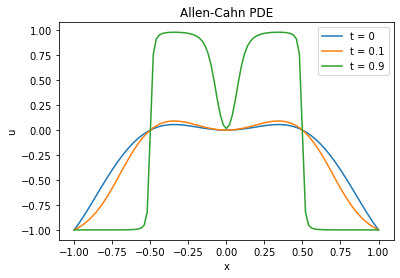

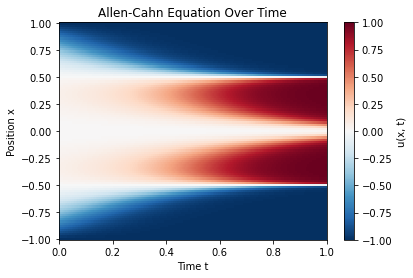

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Setting up the simulation
T = 1
dt = 0.001
nx = 101
nt = int(T / dt)

# Setting up the x values and step size
x = np.linspace(-1, 1, nx)
hx = x[1] - x[0]

# Function to set up initial condition
def initialize_u(x_values):
    result = []
    for xi in x_values:
        value = xi**2 * np.cos(np.pi * xi)
        result.append(value)
    return np.array(result)

# Getting the initial condition
u = initialize_u(x)

# Storing the initial condition for plotting later
history = [(0, list(u))] 

# To store all the u values over time
u_values = [list(u)]

# Looping over time
for n in range(nt):
    # Getting the second derivative using finite differences
    uxx = []
    for i in range(nx):
        if i == 0:
            left = u[-1]
            center = u[i]
            right = u[i+1]
        elif i == nx - 1:
            left = u[i-1]
            center = u[i]
            right = u[0]
        else:
            left = u[i-1]
            center = u[i]
            right = u[i+1]
        value = (right - 2*center + left) / (hx**2)
        uxx.append(value)
    uxx = np.array(uxx)
    
    # Updating u
    for i in range(nx):
        u[i] = u[i] + dt * (0.0001 * uxx[i] - 5 * u[i]**3 + 5 * u[i])

    # Storing u
    u_values.append(list(u))
    
    # Storing specific time values for plotting
    t_now = (n + 1) * dt
    if t_now == 0.1 or t_now == 0.9:
        history.append((t_now, list(u)))

# Plotting u at t=0.1 and t=0.9
for (time, u_time) in history:
    plt.plot(x, u_time, label="t = " + str(time))
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("u")
plt.title("Allen-Cahn PDE")
plt.show()

# Plotting u over all time values
u_values = np.array(u_values)
X, T_mesh = np.meshgrid(x, np.linspace(0, T, nt+1))
plt.pcolormesh(T_mesh, X, u_values, shading='auto', cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar(label='u(x, t)')
plt.xlabel('Time t')
plt.ylabel('Position x')
plt.title('Allen-Cahn Equation Over Time')
plt.show()
